
### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2020 Semester 1

## Assignment 1: Naive Bayes Classifiers

###### Submission deadline: 7 pm, Monday 20 Apr 2020

**Student Name(s):**    `Alec Yu, Michael Jaworski`

**Student ID(s):**     `993433, 833751`


This iPython notebook is a template which you will use for your Assignment 1 submission.

Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook (Submitted in a separate PDF file).

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find.

**Adding proper comments to your code is MANDATORY. **

### in this part we load the required libraries...

In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter
from math import sqrt, e, pi, log
from random import sample
import matplotlib.pyplot as plt
from random import shuffle, seed

### helped functions that we use...

In [2]:
def get_filenames(location: str):
    
    # returns filenames from datasets folder location, so we can see what datafiles we are working with
    
    files = os.listdir(location)
    
    return [filename.replace(".data", "") for filename in files if ".data" in filename]
    

def read_data(filename: str):  
    
    # reads the filename.data data file and the filename.h header file and return a dataframe 
    
    df = pd.read_csv(f"datasets/{filename}.data", header=None)
    header = open(f"datasets/{filename}.h", "r").read().split(",")
    df.columns = header
    
    return df

def get_dtypes(filename: str):
    
    # gets the intended datatype of the different datafiles, as was recorded in the .names file (particularly relevant for mixed data)
    
    adult_dtypes = {
        "age": "numeric",
        "workclass": "categoric", 
        "fnlwgt": "numeric",
        "education": "categoric",
        "education-num": "numeric",
        "marital-status": "categoric",
        "occupation": "categoric",
        "relationship": "categoric",
        "race": "categoric",
        "sex": "categoric",
        "capital-gain": "numeric",
        "capital-loss": "numeric",
        "hours-per-week": "numeric",
        "native-country": "categoric"    
    }
    
    bank_dtypes = {
        "1": "numeric",
        "2": "categoric", 
        "3": "categoric",
        "4": "categoric",
        "5": "categoric",
        "6": "categoric",
        "7": "categoric",
        "8": "categoric",
        "9": "categoric",
        "10": "numeric",
        "11": "categoric",
        "12": "categoric",
        "13": "numeric",
        "14": "categoric"
    }
    
    university_dtypes = {
        "university-name": "categoric",
        "state": "categoric",
        "control": "categoric",
        "number-of-students": "numeric",
        "male:female-ratio": "numeric",
        "student:faculty-ratio": "numeric",
        "sat-verbal": "numeric",
        "sat-math": "numeric",
        "expenses": "categoric",
        "percent-financial-aid": "numeric",
        "number-of-applicants": "categoric",
        "percent-admittance": "numeric",
        "percent-enrolled": "numeric",
        "academics": "numeric",
        "social": "categoric",
        "quality-of-life": "categoric",
        "academic-emphasis": "categoric"   
    }
    
    dtypes = {
        "adult": adult_dtypes,
        "bank": bank_dtypes,
        "university": university_dtypes
    }
    
    try:
        dtypes = dtypes[filename]
    except:
        dtypes = None
        
    return dtypes

def replace_all(df, d):
    
    # replace multiple strings (i.e. '?' and 'unknown' with np.nan)
    
    for k, v in d.items():
        df = df.replace(k, v)
    
    return df

# # find nan encoding i.e. '?' or 'unknown' 

# # get filenames
# filenames = get_filenames("datasets")

# attribute_values_list = []

# for filename in filenames:
    
#     df = read_data(filename)
    
#     for column in df.columns[:-1]:
#         attribute_values = df[column].tolist()
#         attribute_values_list.append(attribute_values)
        
# # sort attribute values by frequency

# attribute_values = [value for attribute_values in attribute_values_list for value in attribute_values]
# attribute_value_counter = Counter(attribute_values)
# attribute_value_counter = {k:v for k, v in sorted(attribute_value_counter.items(), key = lambda item: item[1], reverse = True)}

# hence, 'unknown' and '?' represent missing values... replace missing values with np.nan.

# k_means discretization function.
# optimise_k and get_wss function used to determine optimal k value.

def k_means(values, k, old_centroids = None):

    # 1. Select k points at random to act as seed centroids
    # 2. Assign each instance to the cluster with nearest
    # centroid
    # 3. Recompute centroids of the clusters using current
    # assignment. Centroid = centre or mean point of cluster
    # 4. Repeat step 2 until the assignment of instances to
    # clusters is stable
    
    if old_centroids == None:
        centroids = sample(list(set(values)), k)
    else:
        centroids = old_centroids    
        
    clusters = [None for val in range(len(values))]

    for i in range(len(values)):
        value = values[i]

        # initialize distance to 'infinity' and cluster to 'none'
        distance = np.inf
        cluster = None

        for j in range(len(centroids)):

            centroid = centroids[j]

            if abs(centroid - value) < distance:

                distance = abs(centroid - value)

                clusters[i] = j  

    new_centroids = [[] for i in range(k)]

    for i in range(len(clusters)):
        cluster = clusters[i]
        new_centroids[cluster].append(values[i])
    
    new_centroids = list(map(np.mean, new_centroids))

    if set(new_centroids) == set(centroids):
        return clusters, centroids
    else:
        clusters, centroids = k_means(values, k, new_centroids)
    
    return clusters, centroids

def get_wss(values, clusters, centroids):
    
    # get the weighted sum of squares for k_means, used to find optimal k_value.
    
    se = []

    for i in range(len(values)):
        se.append((centroids[clusters[i]] - values[i]) ** 2)

    wss = sum(se)

    return wss

def optimize_k(values, ks):
    
    # find optimal k_value for k_means, discretization (not used). we simply chose to use 5 bins.
    
    wsss = {}
    
    for k in ks:
        clusters, centroids = k_means(values, k)
        wss = get_wss(values, clusters, centroids)
        wsss[k] = wss
        
    return wsss

# kss = [3, 5, 10, 50, 100]
# wsss = optimize_k(values, kss)
# plt.plot(list(wsss.keys()), list(wsss.values()))
# plt.title("elbow")

def discretise(df):
    
    # after preprocess function, uses the k-means function to convert numeric columns into categoric columns.
    
    numeric = ['int64', 'float64']
    
    for column in df.select_dtypes(numeric).columns:
        bins, centroids = k_means(df[column].tolist(), 5)
        df[column] = [centroids[bin] for bin in bins]
        df[column] = df[column].astype("category")
        
    return df

## more helper functions, for the model object implementation...

In [3]:
# for our naive bayes implementation...

def get_categoric_priors(df):
    
    # returns dataframe of categorical attributes' prior probabilities
    
    priors = []
    
    for column in df.columns[:-1]:
        
        # create "n" column to be able to aggregate attributes
        
        df2 = df.copy()
        df2["n"] = 1
        
        # get count of classes and count of attribute given class
        
        attributes = df2.groupby(["CLASS", column]).agg({"n": "count"}).reset_index()
        classes = attributes.groupby(["CLASS"])["n"].sum().reset_index().rename(columns = {"n": "total"})
        prior = pd.merge(attributes, classes, on = "CLASS", how = "left")
        
        # create "attribute" column to be able to concat prior dataframes
        
        prior["attribute"] = column
        prior = prior.rename(columns = {column: "attribute_value"})
        
        # get P(attribute|class)
        
        prior["p"] = prior.n / prior.total
        prior = prior[["CLASS", "attribute", "attribute_value", "n", "total", "p"]]
        
        priors.append(prior)
        
    priors = pd.concat(priors)
        
    return priors

# for gnb

def get_numeric_statistics(df):
    
    # returns dataframe of numerical attributes' mean and standard deviation
    
    numerical_statistics = df.agg(["mean", "std"]).transpose().reset_index().rename(columns = {"index": "attribute"})
    
    return numerical_statistics

def gaussian_pdf(x, mean, std):
    
    # gaussian function used to determine P(X = x|C) 
    
    return (1/(std * sqrt(2 * pi))) * e ** (-1/2 * ((x - mean)/std) ** 2)


# class priors

def get_class_priors(df):
    
    # returns the probability of each class occuring
    
    prior = df.groupby(["CLASS"]).size().reset_index().rename(columns = {0: "n"})
    prior["total"] = sum(prior["n"])
    
    # get P(class)
    
    prior["p"] = prior.n / prior.total
    
    return prior

## cross validation implementation...

In [4]:
def get_folds(df, size): 
    
    # gets the indexes of the datatframe, shuffles them around, and splits them into k lists
    
    seed(2020)
    seq = list(range(df.shape[0]))
    shuffle(seq)
    folds = [seq[i::size] for i in range(size)]
    
    return folds

def cross_validation(df, k):
    
    # splits the dataframe into k folds, trains data on k-1 folds and then tests on the remaining fold.
    # performs this k times and returns the average of metric scores.
    
    # split into k-folds
    folds = get_folds(df, k)

    metrics_list = []
    
    # for each fold take it as a test set, merge the other folds and use them as a training_set
    for i in range(len(folds)):
        
        folds2 = folds.copy()

        test_index = folds2.pop(i)
        train_index = [index for fold in folds2 for index in fold]

        test_df = df.iloc[test_index]
        train_df = df.iloc[train_index]

        model = train(train_df)

        predictions = predict(test_df, model)
        labels = test_df['CLASS'].tolist()
        
        metrics = evaluate(labels, predictions)
        
        print(f"cross validation fold {i} accuracy: {metrics}")

        metrics_list.append(metrics)
    
    metrics = np.mean(metrics_list)
    
    return metrics

## preprocess

In [5]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing

def preprocess(df, filename):
    
    # replace missing values with np.nan
    
    replacements = {"unknown": np.nan, "?": np.nan}  
    df = replace_all(df, replacements)
    
    # the mushroom datafile and bank datafile contain a column that has a very high amount of na values, thus drop columns, otherwise drop instances
    if filename == "mushroom" or filename == "bank":
        # drop 'na' columns
        df = df.dropna(axis = "columns")
    else:
        df = df.dropna(axis = "index")
    
    # rearrange class to [-1] position
    CLASS = df.pop("CLASS").astype("category")
    df["CLASS"] = CLASS
    
    # correct dtypes
    
    # convert the data that we read in with read_data() into their intended datatypes.
    
    nominal_files = ["breast-cancer-wisconsin", "mushroom", "lymphography"]
    numeric_files = ["wdbc", "wine"]
    ordinal_files = ["car", "nursery", "somerville"]
    mixed_files = ["adult", "bank", "university"]
    
    if (filename in nominal_files):
        datatype = "nominal"
        for column in df.columns[:-1]:
            df[column] = df[column].astype("category")
            
    elif (filename in ordinal_files):
        datatype = "ordinal"
        for column in df.columns[:-1]:
            df[column] = df[column].astype("category")
        
    elif (filename in numeric_files):
        datatype = "numeric"
        for column in df.columns[:-1]:
            df[column] = pd.to_numeric(df[column])
        
    elif (filename in mixed_files):
        datatype = "mixed"
        dtypes = get_dtypes(filename)
        for column in df.columns[:-1]:
            try:
                dtype = dtypes[column]
                if dtype == "categoric":
                    df[column] = df[column].astype("category")
                if dtype == "numeric":
                    df[column] = pd.to_numeric(df[column])
            except:
                pass
            
    return df

## train

In [6]:
# This function should calculat prior probabilities and likelihoods from the training data and using
# them to build a naive Bayes model.
# returns a model object with the prior probabilities and likelihoods, which can be
# accessed with model.prior_probabilities, model.numeric_statistics
# also contains a predict method to make runtime predictions...
# simple epsilon smoothing is used and log(probabilities) are added together to prevent underflow...

def train(df):

    # for every column in the dataframe.
    # if the column is numeric get the mean and std if the column is categoric get the attribute prior
    #
    
    class train_model:
        def __init__(self, class_priors, categoric_priors, numeric_statistics):
            
            self.class_priors = class_priors
            self.categoric_priors = categoric_priors
            self.numeric_statistics = numeric_statistics

        def gaussian_pdf(self, x, mean, std):
            # gaussian function used to determine P(X = x|C) 
            return (1/(std * sqrt(2 * pi))) * e ** (-1/2 * ((x - mean)/std) ** 2)

        def predict(self, df):
            
            # epsilon smoothing value
            epsilon = 1/(df.size + 1)
            
            predictions = []
            
            dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
            
            CLASSES = model.class_priors.CLASS.tolist()
            
            class_ps = {}
            
            for row_number, row in df.iterrows():

                for CLASS in CLASSES:

                    attribute_ps = {}

                    for index in row.index[:-1]:

                        attribute = index 
                        attribute_value = row[index]

                        if dtypes[attribute] in categoric:

                            attribute_p = model.categoric_priors.loc[
                                (model.categoric_priors["CLASS"] == CLASS) & \
                                (model.categoric_priors["attribute"] == attribute) & \
                                (model.categoric_priors["attribute_value"] == attribute_value)
                            ].p.values[0]
                            
                            # simple epsilon smoothing
                            if (attribute_p == 0):
                                attribute_p = epsilon
                            
                            attribute_ps[attribute] = attribute_p

                        elif dtypes[attribute] in numeric:

                            mean = model.numeric_statistics.loc[
                                model.numeric_statistics.attribute == attribute
                            ]["mean"].values[0]
                            
                            std = model.numeric_statistics.loc[
                                model.numeric_statistics.attribute == attribute
                            ]["std"].values[0]

                            attribute_p = model.gaussian_pdf(attribute_value, mean, std)
                            
                            # simple epsilon smoothing
                            if (attribute_p == 0):
                                attribute_p = epsilon
                            
                            attribute_ps[attribute] = attribute_p
                            
                        else:
                            attribute_ps[attribute] = epsilon

                    class_p = model.class_priors.loc[
                        model.class_priors["CLASS"] == CLASS
                    ].p.values[0]
                    
                    class_p = log(class_p)
                    
                    # for value in attribute_ps.values():
                    #     class_p *= value
                        
                    # logarithmic smoothing
        
                    for value in attribute_ps.values():
                        class_p += log(value)

                    class_ps[CLASS] = class_p

                prediction = list({k: v for k, v in sorted(class_ps.items(), key=lambda item: item[1], reverse=True)}.keys())[0]

                predictions.append(prediction)
                                   
            return predictions
    
    ###
    
    numeric = ['int64', 'float64']
    categoric = ['category']
    
    class_priors = get_class_priors(df)

    if len(df.select_dtypes(numeric).columns) > 1:
        numeric_statistics = get_numeric_statistics(df.select_dtypes(numeric))
    else:
        numeric_statistics = None
        
    if len(df.select_dtypes(categoric).columns) > 1:
        categoric_priors = get_categoric_priors(df.select_dtypes(categoric))
    else:
        categoric_priors = None
    
    model = train_model(class_priors, categoric_priors, numeric_statistics)
        
    return model

## predict

In [7]:
# calls the predict() method within model to create a list of probabilities...

def predict(df, model):
    
    predictions = model.predict(df)
    
    return predictions

In [16]:
# input is the true labels and predictions of the data.
# Uses Crude total accuracy, confusion matrix of truth vs classified %'s as evaluation metrics
# Calculates the prediction accuracy and outputs a confusion matrix of truths vs predictions.
# returns an accuracy metric which is used to compare different machine learning methods...

def evaluate(truthlist, predictions):
    # First calculate a crude accuracy score
    correct = 0;
    wrong = 0;
    for i in range(0,len(truthlist)):
        if(truthlist[i] == predictions[i]):
            correct += 1
        else:
            wrong += 1;
    
    accuracy = correct/(correct + wrong)
            
    print("The accuracy of the predictions is: {:.5f}\n".format(accuracy))
        
    # Now construct a confusion matrix of each attribute
    truthSeries = pd.Series(truthlist, name = "Truths")
    predictionSeries = pd.Series(predictions, name = "Predictions")
    confusionDf = pd.crosstab(truthSeries, predictionSeries, rownames=["Truths"], colnames=["Predicted"], margins = True)
    print("Confusion Matrix of Truths vs Predicted frequencies\n")
    print(confusionDf)
    print("\n\n")
    
    # Calculate the weighted average of Precision, Recall (Sensitivity), Specificity
    # Get the same confusion matrix but without the margins
    confusionDf = pd.crosstab(truthSeries, predictionSeries, rownames=["Truths"], colnames=["Predicted"], margins = False)
    
    weightedP = 0
    weightedR = 0
    weightedS = 0

    # Calculate the metrics for each row and use a weighted average
    # Precision averaged across all classes c
    for element in confusionDf.iterrows():
        # Try and except assumes that set(truths) != set(predictions)
        try:
            TP = confusionDf[element[0]][element[0]]
        except:
            TP = 0

        FN = sum(confusionDf.loc[element[0], :].values) - TP

        try:
            FP = sum(confusionDf[element[0]].values) - TP
        except:
            FP = 0
            
        TN = confusionDf.values.sum() - TP - FN - FP
        
        # Weight each metric according to classinstances/totalinstances
        weight = sum(element[1].values) / confusionDf.values.sum()
        sensitivity = TP / (TP + FN)
        recall = TN / (TN + FP)
        
        try:
            precision = TP / (TP + FP)
        except:
            precision = 0
        
        weightedP += weight * precision
        weightedS += weight * sensitivity 
        weightedR += weight * recall
        
    print("Weighted Precision:" , weightedP)
    print("Weighted Recall:", weightedR)
    print("Weighted F1 score using weighted P, R:", 2*weightedP*weightedR/(weightedP+weightedR))
    
    # Now normalise the confusion matrix so its a percentage of classification performance
    confusionDf = pd.crosstab(truthSeries, predictionSeries, rownames=["Truths"], colnames=["Predicted"], margins=False)
    confusionDfNormalised = confusionDf / confusionDf.sum(axis=1)
    
    # Now print out the color map of the classification performaces
    plot_color_map(confusionDfNormalised)
    
    return accuracy

# Plots the confusion matrix
def plot_color_map(confusionDf):
    title = "Confusion Matrix"
    cmap = plt.cm.gray_r
    plt.figure(figsize=(10,8))
    plt.matshow(confusionDf, cmap = cmap, fignum=1)
    
    # Set the scale (0,1) and fontsize for the color bar
    plt.clim(0, 1)
    cbar = plt.colorbar()
    cbar.set_label(label="Classification Performance", weight="bold", fontsize=20)
    cbar.ax.tick_params(labelsize=15)
    
    # Axis information
    tick_marks = np.arange(len(confusionDf.columns))
    plt.xticks(tick_marks, confusionDf.columns, rotation = 45, fontsize=15)
    plt.yticks(tick_marks, confusionDf.index, rotation = -45, fontsize=15)
    plt.ylabel(confusionDf.index.name, fontsize=22)
    plt.xlabel(confusionDf.columns.name, labelpad = 18, fontsize=22)
    
    return

# Finds the most common class label and returns it. Use this to predict all instances as a baseline
def zeroR(df):
    classLabel = df['CLASS'].value_counts().idxmax();
    return classLabel

## model basic workflow...

### 1. pick a file and store it as filename.
### 2. call read_data(filename) on the filename, which merges the ".h" files with the ".data". The ".h" files include the attribute column names.
### 3. preprocess the data by calling preprocess(df, filename). This ensures data columns have the datatype they were intended to have (particularly relevant for mixed datatypes).
### 4. train the model by calling train(df). this returns a model object which stores the class priors, the categoric priors of the data if it is categoric and numeric statistics (mean, std) if it is numeric.
### 5. pass the df and model object into predict(df, model). This calls the model.predict() method which contains the logic for creating predictions. We have used epsilon smoothing to smooth probabilities of 0.

In [17]:
get_filenames("datasets")

['adult',
 'bank',
 'breast-cancer-wisconsin',
 'car',
 'lymphography',
 'mushroom',
 'nursery',
 'somerville',
 'trainingtest',
 'university',
 'wdbc',
 'wine']

university
The accuracy of the predictions is: 1.00000

Confusion Matrix of Truths vs Predicted frequencies

Predicted  1   2   3   4   5  All
Truths                           
1          6   0   0   0   0    6
2          0  27   0   0   0   27
3          0   0  84   0   0   84
4          0   0   0  82   0   82
5          0   0   0   0  32   32
All        6  27  84  82  32  231



Weighted Precision: 1.0
Weighted Recall: 1.0
Weighted F1 score using weighted P, R: 1.0


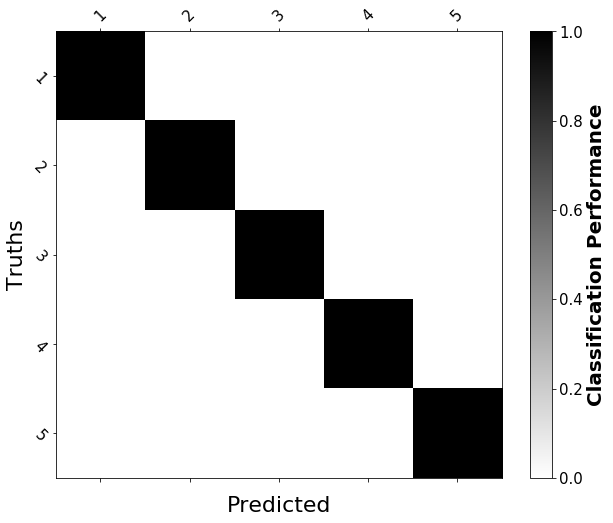

In [18]:
# pick a file 
filename = "university"

print(filename)
    
# read in data
df = read_data(filename)

# preprocess data
df = preprocess(df, filename)

# train model
model = train(df)

predictions = predict(df, model)

labels = df.CLASS.tolist()

metrics = evaluate(labels, predictions)

In [19]:
metrics

1.0

### alternatively, can simply call the cross_validation(df, k) function which splits the data up into training and test sets and then calls the training, testing and evaluation. averaging out the results to get a more robust evaluation metric.

The accuracy of the predictions is: 0.51064

Confusion Matrix of Truths vs Predicted frequencies

Predicted  2   3   4  5  All
Truths                      
1          2   1   0  0    3
2          2   1   1  0    4
3          0   8   9  2   19
4          0   2  11  3   16
5          0   1   1  3    5
All        4  13  22  8   47



Weighted Precision: 0.5014320785597381
Weighted Recall: 0.7903923169242159
Weighted F1 score using weighted P, R: 0.61359433021774
cross validation fold 0 accuracy: 0.5106382978723404
The accuracy of the predictions is: 0.43478

Confusion Matrix of Truths vs Predicted frequencies

Predicted  1  2   3   4  5  All
Truths                         
1          0  0   0   1  1    2
2          0  1   1   3  0    5
3          1  2   9   2  3   17
4          0  0   6   6  1   13
5          0  0   0   5  4    9
All        1  3  16  17  9   46



Weighted Precision: 0.43081308610400676
Weighted Recall: 0.7838618519589009
Weighted F1 score using weighted P, R: 0.556030149

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.50000

Confusion Matrix of Truths vs Predicted frequencies

Predicted  2   3   4  5  All
Truths                      
2          2   4   1  0    7
3          1  10   4  1   16
4          2   3   9  3   17
5          0   1   3  2    6
All        5  18  17  6   46



Weighted Precision: 0.4932367149758454
Weighted Recall: 0.7805481874447391
Weighted F1 score using weighted P, R: 0.6044898524452349
cross validation fold 2 accuracy: 0.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.41304

Confusion Matrix of Truths vs Predicted frequencies

Predicted  2   3   4  5  All
Truths                      
2          1   8   0  0    9
3          0   8   6  2   16
4          0   7   7  2   16
5          0   0   2  3    5
All        1  23  15  7   46



Weighted Precision: 0.5255378521919165
Weighted Recall: 0.7227288794627077
Weighted F1 score using weighted P, R: 0.6085580483690926
cross validation fold 3 accuracy: 0.41304347826086957


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.36957

Confusion Matrix of Truths vs Predicted frequencies

Predicted  1  2   3   4  5  All
Truths                         
1          0  0   1   0  0    1
2          0  0   2   0  0    2
3          0  1   6   9  0   16
4          1  2   6   9  2   20
5          0  0   2   3  2    7
All        1  3  17  21  4   46



Weighted Precision: 0.38518450858604314
Weighted Recall: 0.6605435627174758
Weighted F1 score using weighted P, R: 0.48661053401359305
cross validation fold 4 accuracy: 0.3695652173913043


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


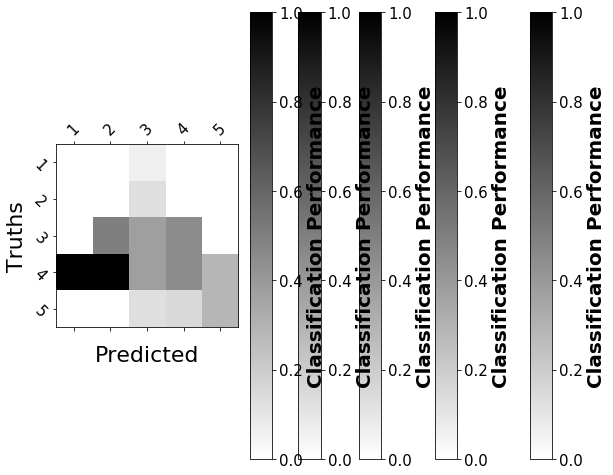

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [20]:
metrics = cross_validation(df, 5)

In [21]:
metrics

0.4456059204440333

### this is an implementation of how we answered question 6 by comparing the performance of naive bayes v gaussian naive bayes on the strictly numeric datasets

wdbc
The accuracy of the predictions is: 0.64912

Confusion Matrix of Truths vs Predicted frequencies

Predicted    B  All
Truths             
B           74   74
M           40   40
All        114  114



Weighted Precision: 0.4213604185903355
Weighted Recall: 0.3508771929824561
Weighted F1 score using weighted P, R: 0.3829022536412774
cross validation fold 0 accuracy: 0.6491228070175439
The accuracy of the predictions is: 0.59649

Confusion Matrix of Truths vs Predicted frequencies

Predicted    B  All
Truths             
B           68   68
M           46   46
All        114  114



Weighted Precision: 0.355801785164666
Weighted Recall: 0.40350877192982454
Weighted F1 score using weighted P, R: 0.37815657912515377
cross validation fold 1 accuracy: 0.5964912280701754


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.52632

Confusion Matrix of Truths vs Predicted frequencies

Predicted    B  All
Truths             
B           60   60
M           54   54
All        114  114



Weighted Precision: 0.27700831024930744
Weighted Recall: 0.47368421052631576
Weighted F1 score using weighted P, R: 0.3495824431928529
cross validation fold 2 accuracy: 0.5263157894736842


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.69912

Confusion Matrix of Truths vs Predicted frequencies

Predicted    B  All
Truths             
B           79   79
M           34   34
All        113  113



Weighted Precision: 0.488761845093586
Weighted Recall: 0.3008849557522124
Weighted F1 score using weighted P, R: 0.3724730752453749
cross validation fold 3 accuracy: 0.6991150442477876


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.67257

Confusion Matrix of Truths vs Predicted frequencies

Predicted    B  All
Truths             
B           76   76
M           37   37
All        113  113



Weighted Precision: 0.4523455243167046
Weighted Recall: 0.3274336283185841
Weighted F1 score using weighted P, R: 0.3798848322121406
cross validation fold 4 accuracy: 0.672566371681416


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.92982

Confusion Matrix of Truths vs Predicted frequencies

Predicted   B   M  All
Truths                
B          69   5   74
M           3  37   40
All        72  42  114



Weighted Precision: 0.9311821219715957
Weighted Recall: 0.9276078710289237
Weighted F1 score using weighted P, R: 0.9293915600523959
cross validation fold 0 accuracy: 0.9298245614035088


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.93860

Confusion Matrix of Truths vs Predicted frequencies

Predicted   B   M  All
Truths                
B          66   2   68
M           5  41   46
All        71  43  114



Weighted Precision: 0.9392257256308145
Weighted Recall: 0.9232960918921344
Weighted F1 score using weighted P, R: 0.9311927878866848
cross validation fold 1 accuracy: 0.9385964912280702


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.93860

Confusion Matrix of Truths vs Predicted frequencies

Predicted   B   M  All
Truths                
B          59   1   60
M           6  48   54
All        65  49  114



Weighted Precision: 0.9417499793439642
Weighted Recall: 0.933625730994152
Weighted F1 score using weighted P, R: 0.9376702577855349
cross validation fold 2 accuracy: 0.9385964912280702


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.98230

Confusion Matrix of Truths vs Predicted frequencies

Predicted   B   M  All
Truths                
B          78   1   79
M           1  33   34
All        79  34  113



Weighted Precision: 0.9823008849557522
Weighted Recall: 0.9756291224902642
Weighted F1 score using weighted P, R: 0.9789536365101287
cross validation fold 3 accuracy: 0.9823008849557522


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.92035

Confusion Matrix of Truths vs Predicted frequencies

Predicted   B   M  All
Truths                
B          69   7   76
M           2  35   37
All        71  42  113



Weighted Precision: 0.9264821970169098
Weighted Recall: 0.9334867004871663
Weighted F1 score using weighted P, R: 0.9299712595344843
cross validation fold 4 accuracy: 0.9203539823008849
wine


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.44444

Confusion Matrix of Truths vs Predicted frequencies

Predicted   2  All
Truths            
1          10   10
2          16   16
3          10   10
All        36   36



Weighted Precision: 0.19753086419753085
Weighted Recall: 0.5555555555555556
Weighted F1 score using weighted P, R: 0.2914389799635701
cross validation fold 0 accuracy: 0.4444444444444444


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.41667

Confusion Matrix of Truths vs Predicted frequencies

Predicted   2  All
Truths            
1          13   13
2          15   15
3           8    8
All        36   36



Weighted Precision: 0.17361111111111113
Weighted Recall: 0.5833333333333333
Weighted F1 score using weighted P, R: 0.26758409785932724
cross validation fold 1 accuracy: 0.4166666666666667


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.45714

Confusion Matrix of Truths vs Predicted frequencies

Predicted   2  All
Truths            
1          11   11
2          16   16
3           8    8
All        35   35



Weighted Precision: 0.20897959183673467
Weighted Recall: 0.5428571428571428
Weighted F1 score using weighted P, R: 0.30178377539941054
cross validation fold 2 accuracy: 0.45714285714285713


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.40000

Confusion Matrix of Truths vs Predicted frequencies

Predicted   2  All
Truths            
1           7    7
2          14   14
3          14   14
All        35   35



Weighted Precision: 0.16000000000000003
Weighted Recall: 0.6000000000000001
Weighted F1 score using weighted P, R: 0.2526315789473685
cross validation fold 3 accuracy: 0.4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.28571

Confusion Matrix of Truths vs Predicted frequencies

Predicted   2  All
Truths            
1          17   17
2          10   10
3           8    8
All        35   35



Weighted Precision: 0.08163265306122448
Weighted Recall: 0.7142857142857143
Weighted F1 score using weighted P, R: 0.14652014652014653
cross validation fold 4 accuracy: 0.2857142857142857


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.97222

Confusion Matrix of Truths vs Predicted frequencies

Predicted   1   2   3  All
Truths                    
1          10   0   0   10
2           1  15   0   16
3           0   0  10   10
All        11  15  10   36



Weighted Precision: 0.9747474747474748
Weighted Recall: 0.9893162393162392
Weighted F1 score using weighted P, R: 0.9819778239321311
cross validation fold 0 accuracy: 0.9722222222222222


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 1.00000

Confusion Matrix of Truths vs Predicted frequencies

Predicted   1   2  3  All
Truths                   
1          13   0  0   13
2           0  15  0   15
3           0   0  8    8
All        13  15  8   36



Weighted Precision: 1.0
Weighted Recall: 1.0
Weighted F1 score using weighted P, R: 1.0
cross validation fold 1 accuracy: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.97143

Confusion Matrix of Truths vs Predicted frequencies

Predicted   1   2  3  All
Truths                   
1          11   0  0   11
2           0  15  1   16
3           0   0  8    8
All        11  15  9   35



Weighted Precision: 0.9746031746031745
Weighted Recall: 0.9915343915343915
Weighted F1 score using weighted P, R: 0.9829958822423838
cross validation fold 2 accuracy: 0.9714285714285714


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 0.94286

Confusion Matrix of Truths vs Predicted frequencies

Predicted  1   2   3  All
Truths                   
1          6   1   0    7
2          0  13   1   14
3          0   0  14   14
All        6  14  15   35



Weighted Precision: 0.9447619047619047
Weighted Recall: 0.9619047619047618
Weighted F1 score using weighted P, R: 0.9532562675419818
cross validation fold 3 accuracy: 0.9428571428571428


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The accuracy of the predictions is: 1.00000

Confusion Matrix of Truths vs Predicted frequencies

Predicted   1   2  3  All
Truths                   
1          17   0  0   17
2           0  10  0   10
3           0   0  8    8
All        17  10  8   35



Weighted Precision: 0.9999999999999999
Weighted Recall: 0.9999999999999999
Weighted F1 score using weighted P, R: 0.9999999999999999
cross validation fold 4 accuracy: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


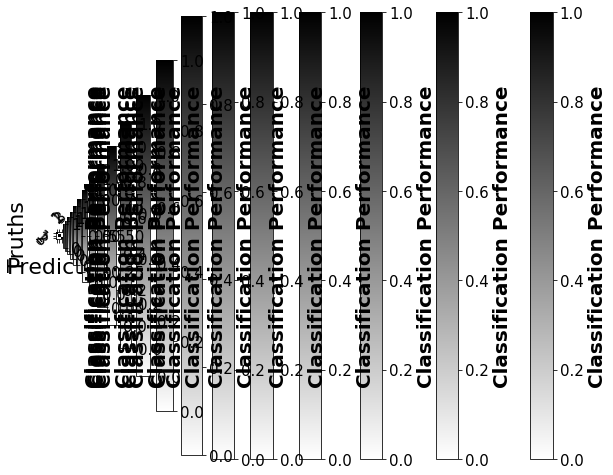

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [22]:
nominal_files = ["breast-cancer-wisconsin", "mushroom", "lymphography"]
numeric_files = ["wdbc", "wine"]
ordinal_files = ["car", "nursery", "somerville"]
mixed_files = ["adult", "bank", "university"]

metrics_df_list = []

for filename in numeric_files:
    
    print(filename)
    
    # read in data
    df = read_data(filename)

    # preprocess data
    df = preprocess(df, filename)

    df = df.iloc[1:]
    
    # discretise df
    df2 = df.copy()
    df2 = discretise(df2)
    
    metrics = cross_validation(df, 5)
    metrics2 = cross_validation(df2, 5)

    metrics_df = pd.DataFrame(data = {"filename": [filename], "accuracy": [metrics], "accuracy_discretised": [metrics2]})
    
    metrics_df_list.append(metrics_df)
    
metrics_df = pd.concat(metrics_df_list)

In [23]:
metrics_df

,filename,accuracy,accuracy_discretised
0,wdbc,0.628722,0.941934
0,wine,0.400794,0.977302
